In [1]:
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt 
import string
import os
from PIL import Image
import glob
from pickle import dump, load
from tqdm import tqdm_notebook as tqdm
from time import time
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import LSTM, Embedding, TimeDistributed, Dense, RepeatVector,\
                         Activation, Flatten, Reshape, concatenate, Dropout, BatchNormalization
import h5py
from keras.optimizers import Adam, RMSprop
from keras.layers.wrappers import Bidirectional
from keras.layers.merge import add
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras import Input, layers
from keras import optimizers
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
try:
    import dill as pickle
except ImportError:
    import pickle

# Loading Caption Generator Model

In [10]:
model = load(open('/home/vinit/Desktop/Projects/Image Captioning/Caption_generator_Model.pkl', 'rb'))

In [12]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 35)           0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            (None, 2048)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 35, 200)      411400      input_2[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 2048)         0           input_1[0][0]                    
__________________________________________________________________________________________________
dropout_2 

In [13]:
images = '/home/vinit/Desktop/Projects/Image Captioning/Flicker8k_Dataset/'

In [14]:
with open("/home/vinit/Desktop/Projects/Image Captioning/Dataset/encoded_test_images.pkl", "rb") as encoded_pickle:
    encoding_test = load(encoded_pickle)

In [21]:
# Loading wordtoix
wordtoix = load(open("/home/vinit/Desktop/Projects/Image Captioning/Dataset/wordtoix.pkl", "rb"))
print('Wordtoix Length = %d' % len(wordtoix))

Wordtoix Length = 2056


In [26]:
ixtoword = {}
for word, i in wordtoix.items():
    ixtoword[i] = word

In [15]:
Directory_path = "/home/vinit/Desktop/Projects/Image Captioning/Flicker8k_Dataset/"

In [16]:
def greedySearch(photo):
    in_text = 'startseq'
    for i in range(max_length):
        sequence = [wordtoix[w] for w in in_text.split() if w in wordtoix]
        sequence = pad_sequences([sequence], maxlen=max_length)
        yhat = model.predict([photo,sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = ixtoword[yhat]
        in_text += ' ' + word
        if word == 'endseq':
            break
    final = in_text.split()
    final = final[1:-1]
    final = ' '.join(final)
    return final

In [23]:
max_length = 35

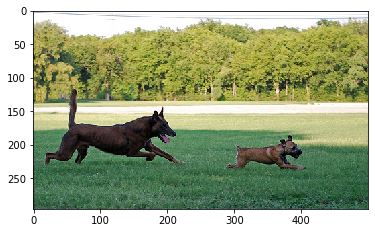

Greedy: two dogs play together in the grass


In [42]:
z = 18
pic = list(encoding_test.keys())[z]
image = encoding_test[pic].reshape((1,2048))
x=plt.imread(Directory_path+pic)
plt.imshow(x)
plt.show()
print("Greedy:",greedySearch(image))

In [38]:
image

array([[0.16126555, 0.16957909, 0.33542797, ..., 0.34807745, 1.4409045 ,
        0.4743738 ]], dtype=float32)